## K-means clustering
<hr>

## 0. load the data from the files
<hr>
load the data from the files

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('data-kmeans.csv')
data = dataset.values

print(data.shape)

(200, 2)


## 1. define a function to compute a distance between two points aaa and bbb
<hr>

In [36]:
def compute_distance(a, b):
    
    #distance between a and b#
    dist = np.sum((a - b) ** 2)
    return np.sqrt(dist)

temp_a = np.array([0, 0]);
temp_b = np.array([5, 2]);
print(compute_distance(temp_a, temp_b));

5.385164807134504


## 2. define a function to compute a centroid from a given set of points ZZZ
<hr>

In [37]:
def compute_centroid(Z):
    
    #centroid of a set of points in P#
    center = sum(Z, 0.0) / len(Z)

    return center


## 3. define a function to determine the label of point zzz with a set of centroids MMM
<hr>

In [38]:
def compute_label(z, M):

    # label of point z with a set of centroids M #
    dist_list = np.zeros(len(M))
    for i in range(0, len(M)):
        dist_list[i] = compute_distance(z, M[i])
        
    label = dist_list.argmin()
    
    return label


temp_z = np.array([0, 0])
temp_M = np.array([[1, 10], [0, 1], [100, 100]])

print(compute_label(temp_z, temp_M))

1


## 4. define a function to compute the loss with a set of clusters CCC and a set of centroids MMM
<hr>

In [39]:
def compute_loss(C, M):

    # compute loss #
    loss = 0
    for c in C :
        loss = loss + compute_distance(c, M)    
    
    if(len(C) == 0) :
        return 0
    return loss / len(C)

temp_c = np.array([[5, 5], [1, 2]])
temp_m = np.array([0, 0])
print(compute_loss(temp_c, temp_m))

4.653567894682633


## 5. plot the data points

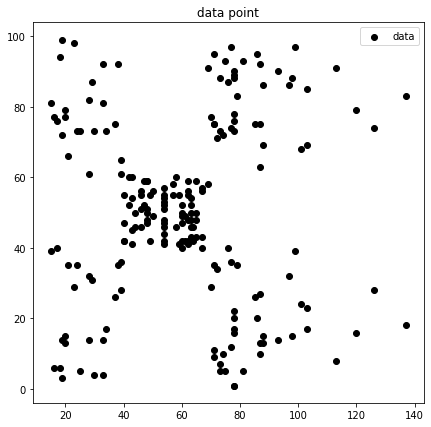

In [40]:
x = data[:,0] 
y = data[:,1]

plt.figure(figsize = (7, 7))
plt.scatter(x, y, c = 'black', marker = 'o', label = 'data') 
plt.title('data point')
plt.legend(loc = 'upper right')
plt.show()

## 6. Visualise the initial condition of the point labels
<hr>
initialise the label of each point randomly, k = 5

In [104]:
import random as rand

K = 5
init_label_list = np.zeros(len(data))
for i in range(len(data)):
    init_label_list[i] = rand.randint(0, K-1)
    
init_M_list = np.zeros([K, 2])

for i in range(K):
    init_M_list[i] = compute_centroid(data[init_label_list == i])


visualise the centroid of each cluster as well <br>
use different colors for different cluster labels

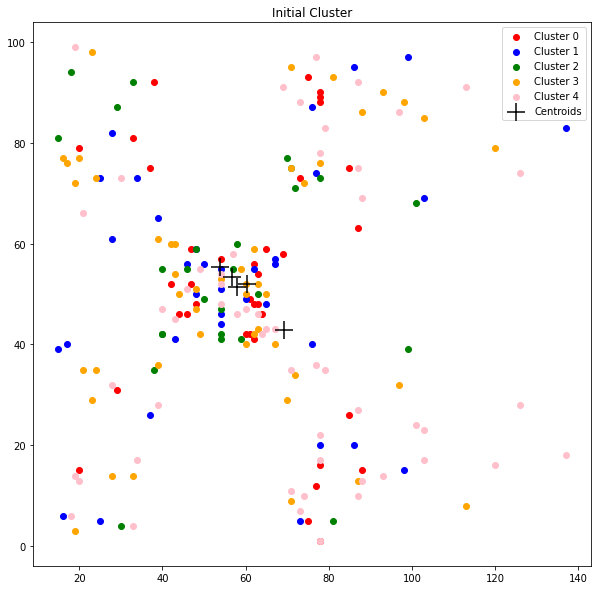

In [105]:
cluster0_list = data[init_label_list == 0]
cluster1_list = data[init_label_list == 1]
cluster2_list = data[init_label_list == 2]
cluster3_list = data[init_label_list == 3]
cluster4_list = data[init_label_list == 4]

plt.figure(figsize = (10, 10))
plt.scatter(cluster0_list[:, 0], cluster0_list[:, 1], c = 'red', marker = 'o', label = 'Cluster 0')
plt.scatter(cluster1_list[:, 0], cluster1_list[:, 1], c = 'blue', marker = 'o', label = 'Cluster 1')
plt.scatter(cluster2_list[:, 0], cluster2_list[:, 1], c = 'green', marker = 'o', label = 'Cluster 2')
plt.scatter(cluster3_list[:, 0], cluster3_list[:, 1], c = 'orange', marker = 'o', label = 'Cluster 3')
plt.scatter(cluster4_list[:, 0], cluster4_list[:, 1], c = 'pink', marker = 'o', label = 'Cluster 4')
plt.scatter(init_M_list[:, 0], init_M_list[:, 1], c = 'black', marker = '+', s = 350, label = 'Centroids') 
plt.title('Initial Cluster')
plt.legend(loc = 'upper right')
plt.show()

## 7. Optimisation
<hr>

In [106]:
def compute_k_means(init_label_list, init_M_list, data, K, max_iter):
    
    # return loss_list, label_list, M_list, dist_M_list #
    loss_list = np.empty(1)
    
    prev_label_list = init_label_list
    cur_label_list = np.zeros(len(prev_label_list))
    
    prev_M_list = init_M_list
    cur_M_list = np.zeros([K, prev_M_list.shape[1]])
    
    dist_M_list = np.zeros([1, K])
    zero_point = np.array([0, 0])
    
    # compute first loss
    loss = 0
    for i in range(K):
        loss += compute_loss(data[prev_label_list == i], prev_M_list)
    
    loss_list[0] = loss / K
    
    # compute first dist
    for i in range(K):
        dist_M_list[0][i] = compute_distance(zero_point, prev_M_list[i])
    
    iter = 0
    while iter != max_iter :
         
        iter = iter + 1   
            
        for i in range(K):
            cur_M_list[i] = compute_centroid(data[prev_label_list == i])
        
        for i in range(len(data)):
            cur_label_list[i] = compute_label(data[i], cur_M_list)
        
        loss = np.zeros(1)
        for i in range(K):
            loss[0] += compute_loss(data[cur_label_list == i], cur_M_list[i])
    
        loss_list = np.append(loss_list, loss / K, axis = 0)
        
        dist = np.zeros([1, K])
        for i in range(K):
            dist[0][i] = compute_distance(zero_point, cur_M_list[i])
        
        dist_M_list = np.append(dist_M_list, dist, axis = 0)
        
        prev_M_list = cur_M_list
        prev_label_list = cur_label_list
        
    
    return loss_list, label_list, cur_M_list, dist_M_list



loss_list, label_list, M_list, dist_M_list = compute_k_means(init_label_list, init_M_list, data, K = 5, max_iter = 20)

plot the loss curve

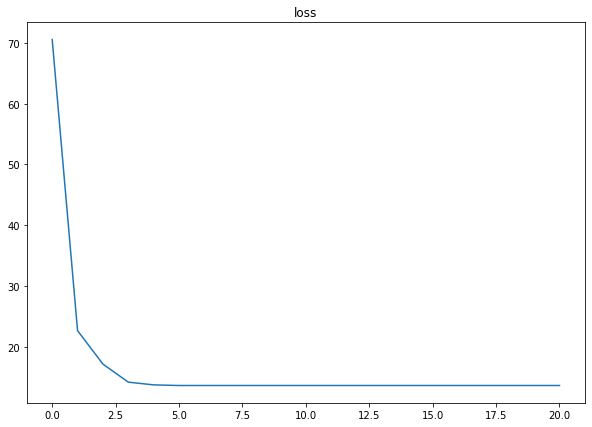

In [110]:
plt.figure(figsize = (10, 7))
plt.plot(loss_list)
plt.title('loss')
plt.show()

Plot the centroid of each clsuter

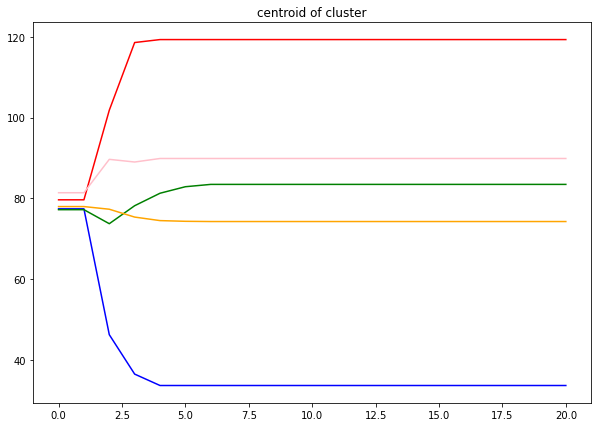

In [108]:
plt.figure(figsize = (10, 7))
plt.plot(dist_M_list[:, 0], c = 'red', label = 'Cluster 0')
plt.plot(dist_M_list[:, 1], c = 'blue', label = 'Cluster 1')
plt.plot(dist_M_list[:, 2], c = 'green', label = 'Cluster 2')
plt.plot(dist_M_list[:, 3], c = 'orange', label = 'Cluster 3')
plt.plot(dist_M_list[:, 4], c = 'pink', label = 'Cluster 4')
plt.title('centroid of cluster')
plt.show()

plot the final clustering result

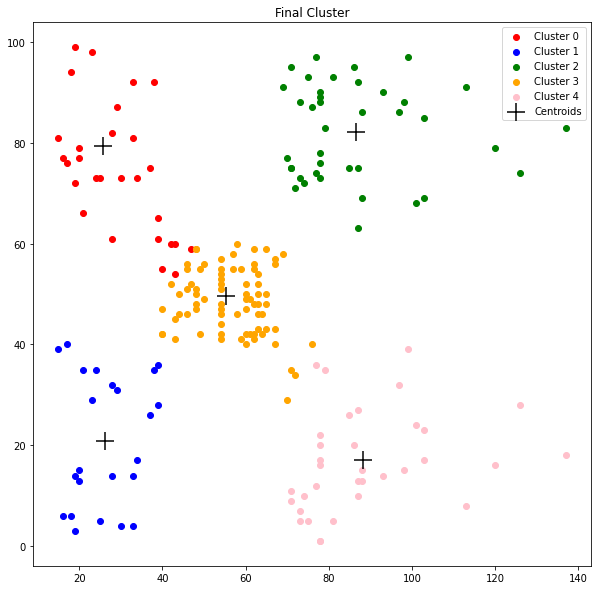

In [109]:
cluster0_list = data[label_list == 0]
cluster1_list = data[label_list == 1]
cluster2_list = data[label_list == 2]
cluster3_list = data[label_list == 3]
cluster4_list = data[label_list == 4]

plt.figure(figsize = (10, 10))
plt.scatter(cluster0_list[:, 0], cluster0_list[:, 1], c = 'red', marker = 'o', label = 'Cluster 0')
plt.scatter(cluster1_list[:, 0], cluster1_list[:, 1], c = 'blue', marker = 'o', label = 'Cluster 1')
plt.scatter(cluster2_list[:, 0], cluster2_list[:, 1], c = 'green', marker = 'o', label = 'Cluster 2')
plt.scatter(cluster3_list[:, 0], cluster3_list[:, 1], c = 'orange', marker = 'o', label = 'Cluster 3')
plt.scatter(cluster4_list[:, 0], cluster4_list[:, 1], c = 'pink', marker = 'o', label = 'Cluster 4')
plt.scatter(M_list[:, 0], M_list[:, 1], c = 'black', marker = '+', s = 300, label = 'Centroids') 
plt.title('Final Cluster')
plt.legend(loc = 'upper right')
plt.show()

# [Output]
<hr>

## 1. plot the data points

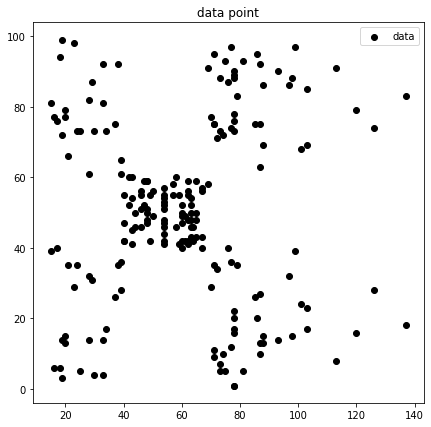

In [43]:
plt.figure(figsize = (7, 7))
plt.scatter(x, y, c = 'black', marker = 'o', label = 'data') 
plt.title('data point')
plt.legend(loc = 'upper right')
plt.show()

## 2. Visualise the initial condition of the point labels [1pt]

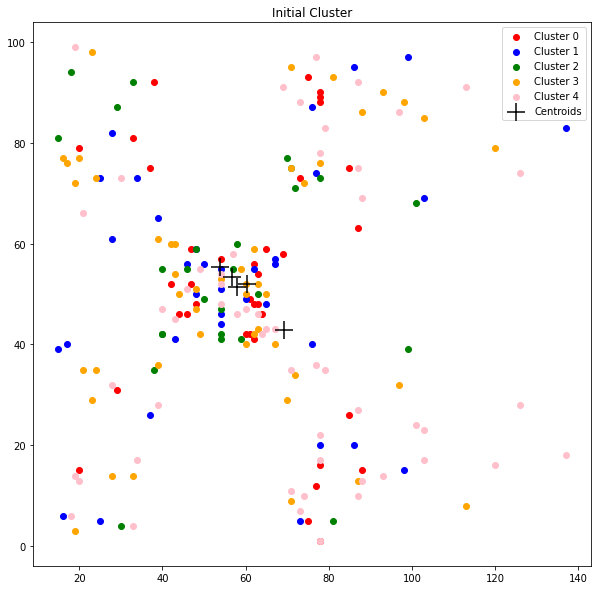

In [112]:
cluster0_list = data[init_label_list == 0]
cluster1_list = data[init_label_list == 1]
cluster2_list = data[init_label_list == 2]
cluster3_list = data[init_label_list == 3]
cluster4_list = data[init_label_list == 4]

plt.figure(figsize = (10, 10))
plt.scatter(cluster0_list[:, 0], cluster0_list[:, 1], c = 'red', marker = 'o', label = 'Cluster 0')
plt.scatter(cluster1_list[:, 0], cluster1_list[:, 1], c = 'blue', marker = 'o', label = 'Cluster 1')
plt.scatter(cluster2_list[:, 0], cluster2_list[:, 1], c = 'green', marker = 'o', label = 'Cluster 2')
plt.scatter(cluster3_list[:, 0], cluster3_list[:, 1], c = 'orange', marker = 'o', label = 'Cluster 3')
plt.scatter(cluster4_list[:, 0], cluster4_list[:, 1], c = 'pink', marker = 'o', label = 'Cluster 4')
plt.scatter(init_M_list[:, 0], init_M_list[:, 1], c = 'black', marker = '+', s = 350, label = 'Centroids') 
plt.title('Initial Cluster')
plt.legend(loc = 'upper right')
plt.show()

## 3. Plot the loss curve [5pt]

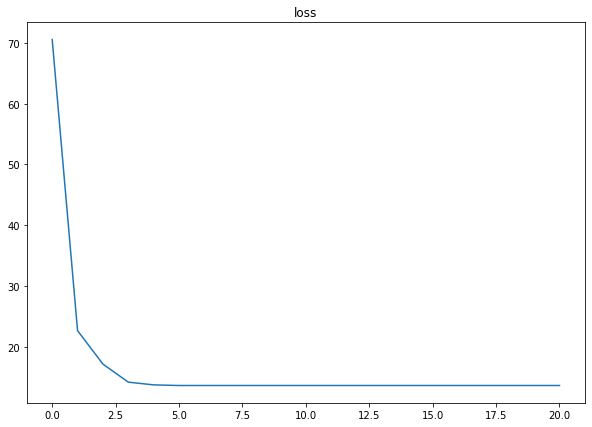

In [113]:
plt.figure(figsize = (10, 7))
plt.plot(loss_list)
plt.title('loss')
plt.show()